读取数据集测试

In [2]:
import os,sys
import json
import torch
from collections import defaultdict
from typing import Dict, List, Tuple, Any
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import DataLoader



PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)


In [ ]:
from src.dataset import build_global_vocab_and_maxcount, CLEVRMultiLabelByImage

clevr_root = "../CLEVR_v1.0"

# 全局统计：colors/shapes/max_objects（train+val+test）
colors, shapes, max_objects, _ = build_global_vocab_and_maxcount(clevr_root, splits=("train","val"))

print("num_colors:", len(colors), colors)
print("num_shapes:", len(shapes), shapes)
print("max_objects:", max_objects)

train_ds = CLEVRMultiLabelByImage(
    clevr_root=clevr_root,
    split="train",
    colors=colors,
    shapes=shapes,
    max_objects=max_objects,
)

train_dl = DataLoader(train_ds, batch_size=4, shuffle=True, num_workers=0)

images, color_mh, shape_mh, count_oh, img_fns = next(iter(train_dl))
print("images:", images.shape)
print("color_mh:", color_mh.shape)   # [B, num_colors]
print("shape_mh:", shape_mh.shape)   # [B, num_shapes]
print("count_oh:", count_oh.shape)   # [B, max_objects+1]
print("example fn:", img_fns[0])
print("example count one-hot argmax:", int(count_oh[0].argmax()))


num_colors: 8 ['blue', 'brown', 'cyan', 'gray', 'green', 'purple', 'red', 'yellow']
num_shapes: 3 ['cube', 'cylinder', 'sphere']
max_objects: 10
images: torch.Size([4, 3, 224, 224])
color_mh: torch.Size([4, 8])
shape_mh: torch.Size([4, 3])
count_oh: torch.Size([4, 11])
example fn: CLEVR_train_059489.png
example count one-hot argmax: 5
0.007843137718737125 1.0


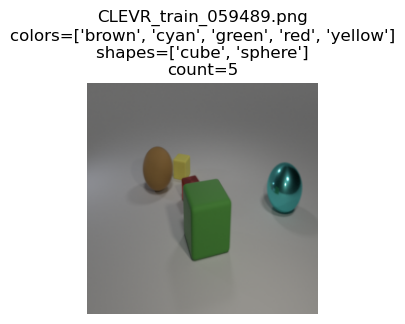

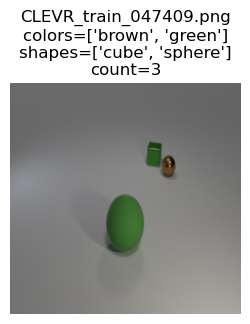

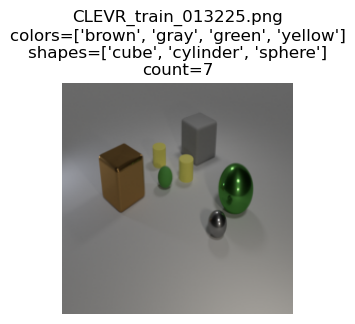

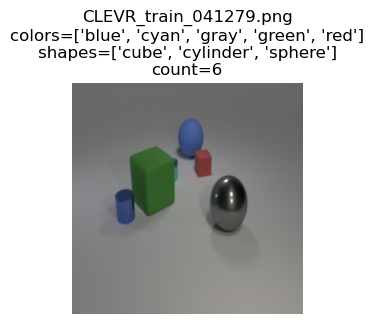

In [4]:
B = images.size(0)

for i in range(B):
    img = images[i]
    # C,H,W -> H,W,C
    img_np = img.permute(1,2,0).numpy()

    # 反解 label
    color_vec = color_mh[i]
    shape_vec = shape_mh[i]
    count_vec = count_oh[i]

    present_colors = [colors[j] for j in range(len(colors)) if color_vec[j] > 0.5]
    present_shapes = [shapes[j] for j in range(len(shapes)) if shape_vec[j] > 0.5]
    obj_count = int(count_vec.argmax().item())

    plt.figure(figsize=(3,3))
    plt.imshow(img_np)
    plt.axis("off")
    plt.title(f"{img_fns[i]}\ncolors={present_colors}\nshapes={present_shapes}\ncount={obj_count}")
    plt.show()